# Python Bindings for JWST

## Loading necessary modules

In [1]:
from astropy.io import fits #astropy modules for FITS IO
import numpy as np #numpy gives us better array management 
import matplotlib  #ploting
matplotlib.use("Agg")  #some hack to stop the bouncing python icon when plotting
import matplotlib.pyplot as plt
#next line is to show plots inline with jupyter
%matplotlib inline 
from matplotlib.colors import LogNorm #for better display of FITS images

## Opening FITS files

In [2]:
#filename='spgen_c_451.fits'                #Simulated Image
filename='stack_NIST714-G-256-3-L.fits'     #CV3 stack 
hdulist = fits.open(filename) #open the FITS file

In [3]:
hdulist.info() #look at contents

Filename: stack_NIST714-G-256-3-L.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       9   (256, 2048)   float32   


In [4]:
scidata = hdulist[0].data #extract the Image
isize=scidata.shape  #need to check size of input image.  transpose if necessary.
if(isize[1]<isize[0]):
    scidata=np.transpose(scidata)
else :
    scidata=np.copy(scidata)

In [5]:
hdulist.close() #close the FITS file

## Displaying the Image

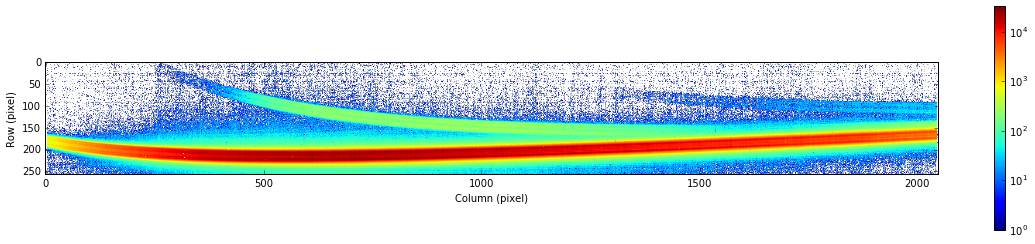

In [19]:
plt.figure(figsize=(20,4)) #adjust size of figure
imgplot = plt.imshow(scidata,norm=LogNorm()) #added log stretch to the plot
plt.xlabel('Column (pixel)') #x-label
plt.ylabel('Row (pixel)') #y-label
imgplot = plt.colorbar() #add colour bar

## Simple column extraction

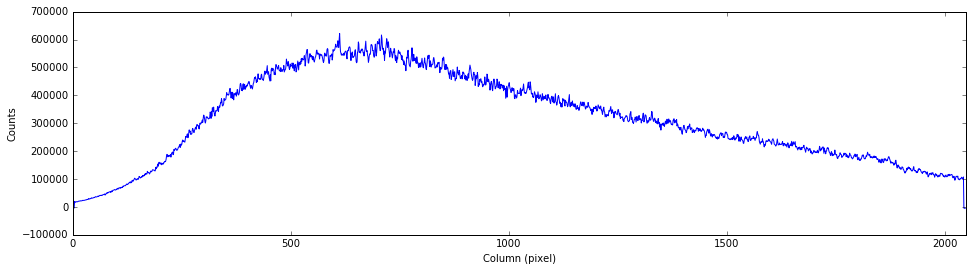

In [7]:
plt.figure(figsize=(16,4)) #adjust size of figure
plt.plot(np.sum(scidata,axis=0)) #Plot the sum of each column
plt.xlabel('Column (pixel)') #x-label
plt.ylabel('Counts') #y-label
x1,x2,y1,y2 = plt.axis() 
plt.axis((0,2048,y1,y2))
plt.show()

## PSF Tools

In [8]:
import jwstniriss as jw  #load JWST-NIRISS Python bindings and wrappers

## Extract Trace for n=1

In [9]:
tr, trpsf = jw.tracespec(scidata) #run the trace program to find the n=1 spectrum
#tr contains the trace for each order, trpsf contains the model parameters from the PSF fit.

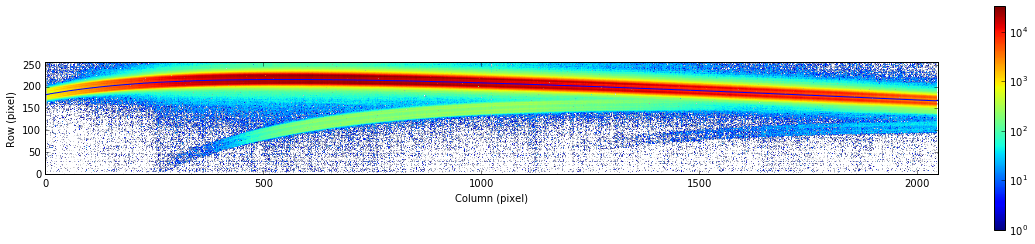

In [18]:
plt.figure(figsize=(20,4)) #adjust size of figure
imgplot = plt.imshow(scidata,norm=LogNorm()) #added log stretch to the plot
imgplot = plt.colorbar() #add colour bar
plt.plot(tr[:,0],c='b') #overlay trace for n=1
plt.xlabel('Column (pixel)') #x-label
plt.ylabel('Row (pixel)') #y-label
x1,x2,y1,y2 = plt.axis() 
plt.axis((0,scidata.shape[1],0,scidata.shape[0]))
plt.show()

## Extract Trace with Aperture

In [13]:
flux=jw.apertureflux(scidata,tr,20,0)  #extract the flux along the trae using a simple aperture

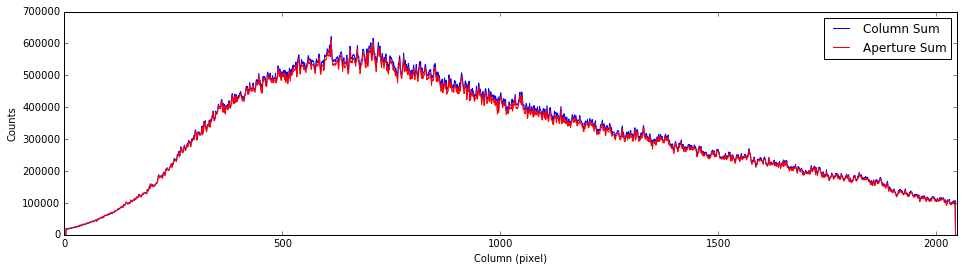

In [17]:
plt.figure(figsize=(16,4)) #adjust size of figure
plt.plot(np.sum(scidata,axis=0),label='Column Sum') #Plot the sum of each column
plt.plot(flux,c='r',label='Aperture Sum') #Plot the sum of each column
plt.xlabel('Column (pixel)') #x-label
plt.ylabel('Counts') #y-label
x1,x2,y1,y2 = plt.axis() 
x1=0
x2=scidata.shape[1]
y1=0
plt.axis((x1,x2,y1,y2))
plt.legend()
plt.show()